In [2]:
from PIL import Image #Libreria PILLOW
import numpy as np    #Libreria NUMPY
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Abro imagen
im= Image.open("grasa.jpg")
im1 = im.resize((350, 350)) 
a= np.asarray(im1)

## Transformación a espacio YIQ
Y = 0.299*R + 0.587*G + 0.114*B \
I = 0.595716*R – 0.274453*G – 0.321263*B \
Q = 0.211456*R – 0.522591*G + 0.311135*B

In [4]:
#Normalizo los bytes RGB
a_norm= a/256

In [5]:
#Armo la matriz de transformación
mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
mat_a_YIQ.T

array([[ 0.299   ,  0.595716,  0.211456],
       [ 0.587   , -0.274453, -0.522591],
       [ 0.114   , -0.321263,  0.311135]])

In [6]:
#Realizo el producto vectorial
b= np.dot(a_norm, mat_a_YIQ.T)

In [7]:
#Creo una matriz para transformar alpha y beta
alpha= 0.7
beta= 1
coe= [alpha,beta,beta]
coe

[0.7, 1, 1]

In [8]:
ancho= b.shape[0]
alto= b.shape[1]
prof= b.shape[2]
ancho, alto, prof

(350, 350, 3)

In [9]:
#Multiplico escalarmente la matriz YIQ por la matriz de coeficientes
c= b*coe

In [10]:
#Hago la correción de Y, I y Q
d=np.zeros([ancho,alto,prof])
for x in range(ancho):
    for y in range(alto):
        d[x][y][0]=c[x][y][0]
        d[x][y][1]=c[x][y][1]
        d[x][y][2]=c[x][y][2]
        if c[x][y][0]>1:
            d[x][y][0]=1
            #print("Corregí Y")
            
        if  c[x][y][1]>0.5957:
            d[x][y][1]= 0.5957
            #print("Corregí I")
            
        if  c[x][y][1]<-0.5957:
            d[x][y][1]= -0.5957
            #print("Corregí I")
            
        if  c[x][y][2]>0.5226:
            d[x][y][2]= 0.5226
            #print("Corregí Q")
            
        if  c[x][y][2]<-0.5226:
            d[x][y][2]= -0.5226
            #print("Corregí Q") 

## Transformación YIQ a RGB
R=Y+0.956*I+0.621*Q \
G=Y-0.272*I-0.647*Q \
B=Y-1.106*I+1.703*Q

In [11]:
#Armo la matriz de transformación
mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
mat_a_RGB.T

array([[ 1.    ,  1.    ,  1.    ],
       [ 0.9663, -0.2721, -1.107 ],
       [ 0.621 , -0.6474,  1.7046]])

In [12]:
#Hago el productor vectorial en la imágen en el espacio YIQ y la matriz de transformación
g= np.dot(d, mat_a_RGB.T)
#Normalizo los bytes
g_bytes= g*255
#Realizo correción para evitar errores cuando convierto de float a uint8
g_bytes[g_bytes<0] = 0
g_bytes[g_bytes>255] =255
#Convierto de float a uint8 para poder representar la imagen
e= g_bytes.astype(np.uint8)

In [13]:
im2= Image.fromarray(e)

Text(0.5, 1.0, 'Alpha 0.7')

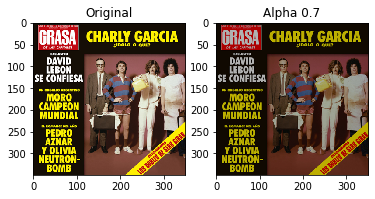

In [14]:
plt.subplot(121), plt.imshow(im1)
plt.title("Original")

plt.subplot(122), plt.imshow(im2)
plt.title("Alpha 0.7")


## Funciones
Para simplificar la codificación se definen 4 funciones.
La función im_to_YIQ(), recibe la componente imagen RGB y la transforma al espacio YIQ.
La función yiq_coef() recibe la componente imagen YIQ y le aplica un coeficiente de correción Alpha a la componente Y, y un coeficiente Beta a la componente I y la componente Q.
La función im_to_RGB(), recibe la componente imagen YIQ y la transforma a RGB.
La función show_to_im(), recibe 2 imagenes y las grafica.

In [20]:
def im_to_YIQ(im):
    im_norm= im/256
    mat_a_YIQ= np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    im_yiq= np.dot(im_norm, mat_a_YIQ.T)
    return im_yiq

def yiq_coef(im, alpha, beta):
    coe= [alpha,beta,beta]
    im_yiq_coef= im*coe
    #Clampeo Y
    im_yiq_coef[:,:,0][im_yiq_coef[:,:,0]>1] = 1
    #Clampeo I
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]>0.5957] = 0.5957
    im_yiq_coef[:,:,1][im_yiq_coef[:,:,1]<(-0.5957)] = (-0.5957)
    #Clampeo Q
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]>0.5226] = 0.5226
    im_yiq_coef[:,:,2][im_yiq_coef[:,:,2]<(-0.5226)] =( -0.5226)
    
    return im_yiq_coef

##CORRECCIÓn

def im_to_RGB(im):
    mat_a_RGB= np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    im_RGB= np.dot(im, mat_a_RGB.T)
    im_RGB*= 255
    #Clampeo RGB
    im_RGB[im_RGB>255]= 255
    im_RGB[im_RGB<0]= 0
    
    return im_RGB.astype(np.uint8)
 
def show_two_im(a, b, text):
    im1= Image.fromarray(a)
    im2= Image.fromarray(b)
    plt.subplot(121), plt.imshow(im1)
    plt.title("Original")

    plt.subplot(122), plt.imshow(im2)
    plt.title(text)

## Alpha=0.4 Beta=1

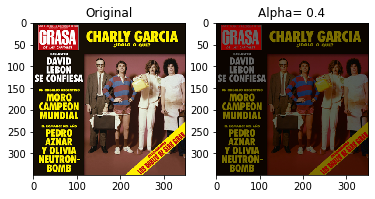

In [27]:
c= yiq_coef(b,0.4,1)
d= im_to_RGB(c)
show_two_im(a,d, "Alpha= 0.4")

## Alpha=1.2 Beta=1

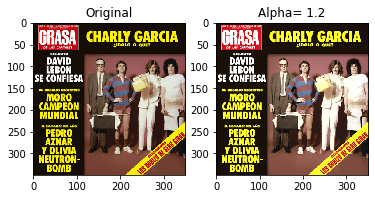

In [29]:
c= yiq_coef(b,1.2,1)
d= im_to_RGB(c)
show_two_im(a,d, "Alpha= 1.2")

## Alpha=1.5 Beta=1

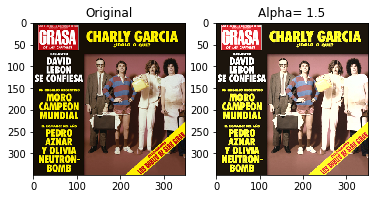

In [30]:
c= yiq_coef(b,1.5,1)
d= im_to_RGB(c)
show_two_im(a,d, "Alpha= 1.5")

## Alpha=1 Beta=0.5

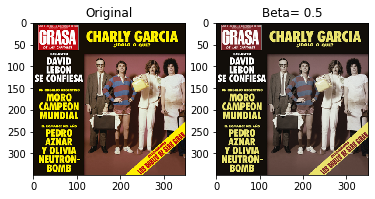

In [32]:
c= yiq_coef(b,1,0.5)
d= im_to_RGB(c)
show_two_im(a,d, "Beta= 0.5")

## Alpha=1 Beta=0

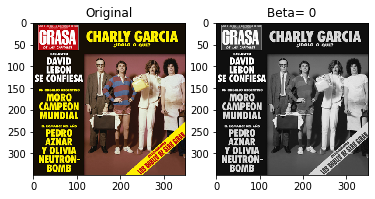

In [34]:
c= yiq_coef(b,1,0)
d= im_to_RGB(c)
show_two_im(a,d, "Beta= 0")

## Alpha=1 Beta=1.2

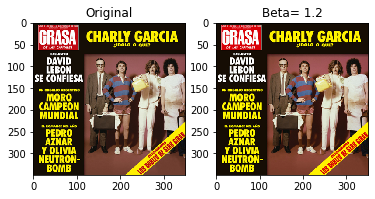

In [35]:
c= yiq_coef(b,1,1.2)
d= im_to_RGB(c)
show_two_im(a,d, "Beta= 1.2")

## Alpha=1 Beta=1.5

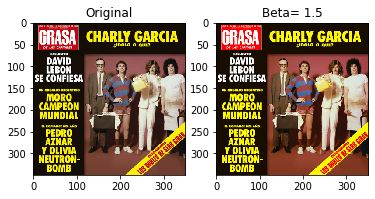

In [36]:
c= yiq_coef(b,1,1.5)
d= im_to_RGB(c)
show_two_im(a,d, "Beta= 1.5")

## Alpha=0.7 Beta=1.8

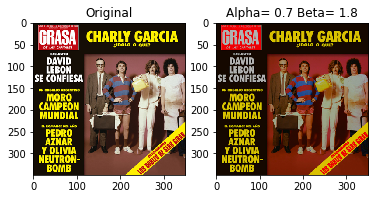

In [38]:
c= yiq_coef(b,0.7,1.8)
d= im_to_RGB(c)
show_two_im(a,d, "Alpha= 0.7 Beta= 1.8")

## Alpha=0.4 Beta=0.3

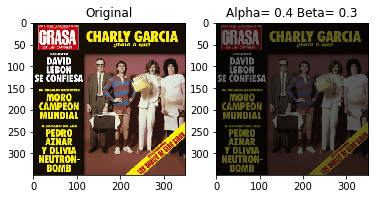

In [39]:
c= yiq_coef(b,0.4,0.3)
d= im_to_RGB(c)
show_two_im(a,d, "Alpha= 0.4 Beta= 0.3")

## Mapas Cromáticos
Se genera un dataset y luego se grafica un mapa de calor. 
Luego se grafíca el mismo mapa de calor con diferentes "Paletas" o mapas cormáticos.

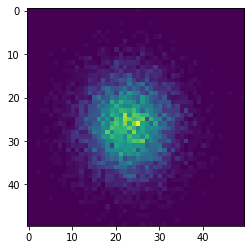

In [58]:
#Genero un dataset utilizando la función randn
x = np.random.randn(8873)
y = np.random.randn(8873)

mapa_calor, eje_x, eje_y= np.histogram2d(x, y, bins=50)
plt.imshow(mapa_calor)

## Pruebo diferetes mapas cromáticos de la librería matplotlib
https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

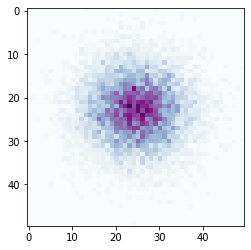

In [54]:
plt.imshow(mapa_calor, cmap="BuPu")

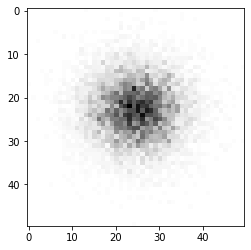

In [55]:
plt.imshow(mapa_calor, cmap="Greys")

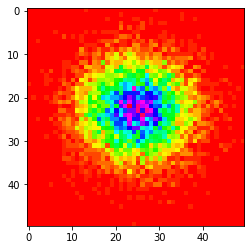

In [56]:
plt.imshow(mapa_calor, cmap="hsv")

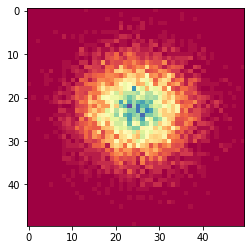

In [57]:
plt.imshow(mapa_calor, cmap="Spectral")

# FIN